In [1]:
import warnings
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
from   datetime          import timedelta

warnings.simplefilter(action='ignore', category=FutureWarning)

<Axes: xlabel='datetime'>

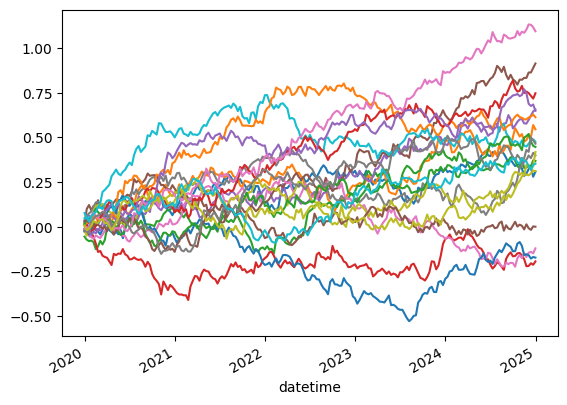

In [2]:
# Preparing data for portfolio

num_securities = 20
num_periods    = 200
start_date     = pd.to_datetime('2020-01-01')
end_date       = pd.to_datetime('2024-12-31')

trade_dates    = pd.to_datetime(np.sort(np.random.choice(pd.date_range(start=start_date, end=end_date, periods=num_periods + 1), num_periods, replace=False)))

df = pd.DataFrame({'datetime'  : trade_dates})
df['datetime' ] = pd.to_datetime(df['datetime'])
df['datetime_'] = df['datetime']
df = df.set_index('datetime')

outliers_percentage = 20.0
outliers_percentage = outliers_percentage/100.0 # percentage of all returns are outliers
outliers_count      = int(num_periods*outliers_percentage)

for idx in range(0, num_securities):
    percentage_changes = np.random.uniform(-0.03, 0.031, num_periods).astype(float)
    extreme_returns    = np.random.uniform(-0.06 , 0.08 , outliers_count).astype(float)
    outliers_date      = df['datetime_'].sample(n=outliers_count).to_list()
    df[f"return_{idx}"] = percentage_changes
    for outlier in list(zip(outliers_date, extreme_returns)):
        outlier_dt  = outlier[0]
        outlier_ret = outlier[1]
        df.loc[outlier_dt, f"return_{idx}"] = outlier_ret
    df[f"cum_ret_{idx}"] = df[f"return_{idx}"].cumsum()

df.drop('datetime_', axis=1, inplace=True)

df.filter(like='cum_ret_').plot(legend=False)

In [3]:
df

,return_0,cum_ret_0,return_1,cum_ret_1,return_2,cum_ret_2,return_3,cum_ret_3,return_4,cum_ret_4,...,return_15,cum_ret_15,return_16,cum_ret_16,return_17,cum_ret_17,return_18,cum_ret_18,return_19,cum_ret_19
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.004990,0.004990,0.008326,0.008326,-0.055865,-0.055865,-0.019765,-0.019765,0.015114,0.015114,...,0.030134,0.030134,-0.012695,-0.012695,-0.022474,-0.022474,0.007544,0.007544,0.046242,0.046242
2020-01-10 03:07:12,0.008414,0.013404,0.021911,0.030236,-0.016988,-0.072853,0.027688,0.007923,0.052159,0.067273,...,0.009896,0.040030,-0.008706,-0.021401,-0.003992,-0.026466,-0.026889,-0.019345,0.002208,0.048449
2020-01-19 06:14:24,-0.024717,-0.011313,0.019880,0.050116,-0.008241,-0.081095,-0.022919,-0.014996,-0.005354,0.061919,...,-0.020160,0.019870,0.014902,-0.006499,-0.010961,-0.037426,0.008421,-0.010924,-0.019326,0.029123
2020-01-28 09:21:36,0.025819,0.014507,-0.006179,0.043937,0.003240,-0.077855,-0.016386,-0.031382,-0.019859,0.042060,...,-0.020749,-0.000879,0.057734,0.051235,0.066875,0.029448,0.016051,0.005127,0.025338,0.054461
2020-02-06 12:28:48,-0.007803,0.006704,0.017821,0.061758,-0.009392,-0.087247,-0.026607,-0.057990,-0.048102,-0.006042,...,0.002428,0.001549,0.027751,0.078986,0.012410,0.041859,0.027341,0.032468,0.016643,0.071104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-24 11:31:12,0.013668,0.297912,0.008568,0.485648,0.002872,0.331481,-0.040289,-0.221839,-0.001548,0.577824,...,0.028623,0.013216,0.018013,1.104811,0.046230,0.430415,0.058974,0.347560,-0.004075,0.365028
2024-12-03 14:38:24,0.024946,0.322858,0.025534,0.511182,0.011301,0.342782,0.001636,-0.220203,0.020740,0.598564,...,-0.022111,-0.008895,0.028829,1.133640,-0.010941,0.419474,-0.009517,0.338043,-0.025088,0.339940
2024-12-12 17:45:36,0.010059,0.332917,-0.008848,0.502335,-0.003537,0.339245,0.015093,-0.205110,0.024601,0.623165,...,-0.008908,-0.017803,-0.001930,1.131710,0.079910,0.499384,-0.018926,0.319117,-0.019627,0.320313


In [4]:
initial_cash = 100000 # 100K USD

In [5]:
# no rebalancing portfolio

allocated_cash = initial_cash/num_securities

for idx in range(0, num_securities):
    df[f"cash_path_{idx}"] = (1+df[f"return_{idx}"]).cumprod()*(allocated_cash)

df['raw_portfolio_cash_path'] = df[[col_name for col_name in df.columns if col_name.startswith("cash")]].sum(axis=1)
df['raw_portfolio_return'   ] = df['raw_portfolio_cash_path'].pct_change()
df['raw_portfolio_cumret'   ] = df['raw_portfolio_return'].cumsum()

In [6]:
# weekly equally weighted rebalancing portfolio

rebalancing_cost = 0.1/100.0  # 0.1% aka 10bps as rebalancing cost
rebalancing_freq = 'W'        # Weekly rebalancing

rebalanced_dates            = []
rebalanced_portfolio_values = []

current_portfolio_value     = initial_cash
for date, group in df.groupby(pd.Grouper(freq=rebalancing_freq)):
    group_df = group.copy()
    allocated_cash = current_portfolio_value/num_securities
    for idx in range(0, num_securities):
        group_df[f"rebalanced_cash_path_{idx}"] = (1+group_df[f"return_{idx}"]).cumprod()*(allocated_cash)
    if not group_df.empty:
        rebalanced_cash_cols = [col_name for col_name in group_df.columns if col_name.startswith("rebalanced_cash_path")]
        current_portfolio_value = group_df.iloc[-1][rebalanced_cash_cols].sum()
        rebalanced_dates.append(date)
        rebalanced_portfolio_values.append(current_portfolio_value)

rebalanced_df       = pd.DataFrame(index=rebalanced_dates)
rebalanced_df.index = pd.to_datetime(rebalanced_df.index)
rebalanced_df['value' ] = rebalanced_portfolio_values
rebalanced_df['return'] = rebalanced_df['value'].pct_change()
rebalanced_df.dropna(inplace=True)


rebalancing_cost_log = np.log(1-rebalancing_cost)
rebalanced_df['log_return'         ] = (1+rebalanced_df['return']).apply(np.log)
rebalanced_df['adjusted_log_return'] = rebalanced_df['log_return'] + rebalancing_cost_log

rebalanced_df['cum_ret'         ] = rebalanced_df['log_return'         ].cumsum().apply(np.exp)
rebalanced_df['adjusted_cum_ret'] = rebalanced_df['adjusted_log_return'].cumsum().apply(np.exp)

In [7]:
rebalanced_df

,value,return,log_return,adjusted_log_return,cum_ret,adjusted_cum_ret
2020-01-12,101111.388824,0.008008,0.007976,0.006976,1.008008,1.007000
2020-01-19,100719.444260,-0.003876,-0.003884,-0.004884,1.004101,1.002093
2020-02-02,101403.341481,0.006790,0.006767,0.005767,1.010919,1.007889
2020-02-09,102954.235135,0.015294,0.015179,0.014178,1.026380,1.022281
2020-02-16,102954.021489,-0.000002,-0.000002,-0.001003,1.026378,1.021256
...,...,...,...,...,...,...
2024-11-24,148547.299159,0.005544,0.005528,0.004528,1.480910,1.218425
2024-12-08,149194.694643,0.004358,0.004349,0.003348,1.487364,1.222512
2024-12-15,149226.153791,0.000211,0.000211,-0.000790,1.487678,1.221547
2024-12-22,150374.135054,0.007693,0.007663,0.006663,1.499122,1.229713


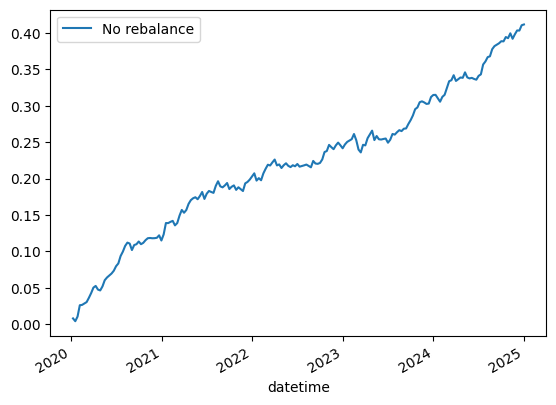

In [8]:
df['raw_portfolio_cumret'].plot()
plt.legend(['No rebalance'])

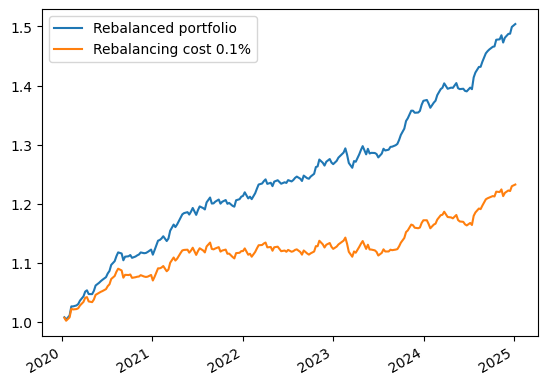

In [9]:
rebalanced_df[['cum_ret', 'adjusted_cum_ret']].plot()
plt.legend(['Rebalanced portfolio', f"Rebalancing cost {round(rebalancing_cost*100,2)}%"])